### 비지도 학습

* 타깃값이 없을 때 데이터에 있는 패턴을 찾거나 데이터 구조를 파악하는 머신러닝 방식
* 대표적인 비지도 학습 작업은 군집, 차원 축소

* 군집(clustering) : 비슷한 샘플끼리 그룹으로 모으는 작업
* 클러스터 : 군집 알고리즘으로 모은 샘플 그룹



In [ ]:
# 과일 사진 데이터 파일 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-07 10:58:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-07 10:58:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-07 10:58:06--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conne

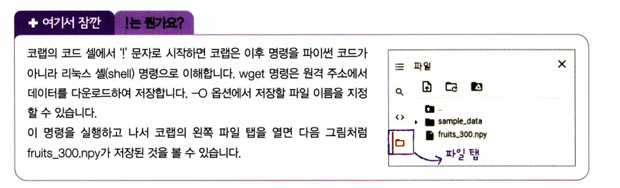

In [ ]:
# 패키지 임포트
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# npy 파일 로드
fruits = np.load('fruits_300.npy')
# 배열의 크기
print(fruits.shape) #샘플의 개수, 이미지 높이, 이미지 너비

(300, 100, 100)


In [ ]:
# 첫 번째 이미지의 첫 번째 행 출력
# 흑백 사진을 담고 있으므로 0〜255까지의 정숫값을 가짐, 0에 가까울수록 어둡고 높아질수록 밝게 표시 됨
print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


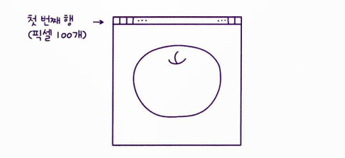

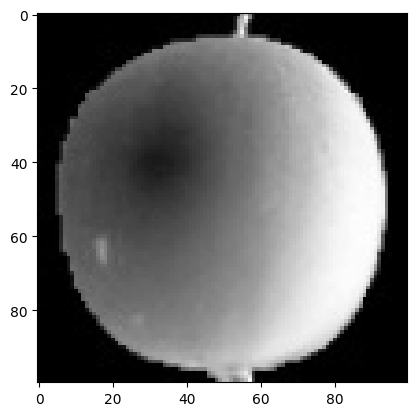

In [ ]:
# 넘파이 배열로 저장된 첫번째 이미지 그리기
# 흑백 이미지이므로 cmap 매개변수를 ‘gray’로 지정
plt.imshow(fruits[0], cmap='gray')
plt.show()
# 바탕이 어둡고 사과가 밝은 이유? 우리의 관심 대상은 바탕이 아닌 사과! 컴퓨터는 255에 가까운 수치에 집중!
# 컴퓨터가 255에 가까운 수치에 집중하는 이유 : 알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 하는데 픽셀값이 0이면 출력도 0이 되어 의미가 없음. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋음.

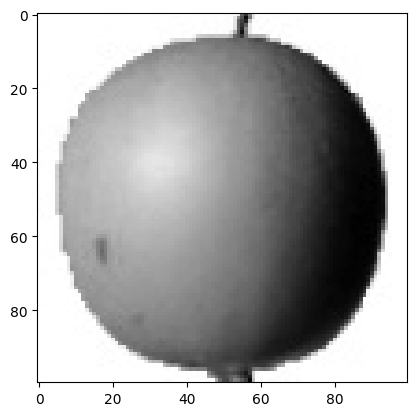

In [ ]:
# cmap 매개변수를‘gray_r’로 지정하면 보기 편하게 색을 반전하여 출력
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

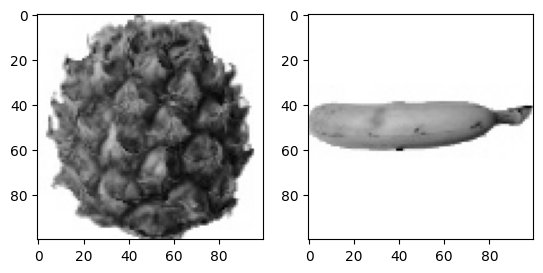

In [ ]:
# 바나나와 파인애플 이미지
# axs : 서브 그래프를 담고 있는 배열
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

#### 픽셀값 분석하기

넘파이 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열 변환

-> 이미지로 출력하긴 어렵지만 배열을 계산할 때 편리



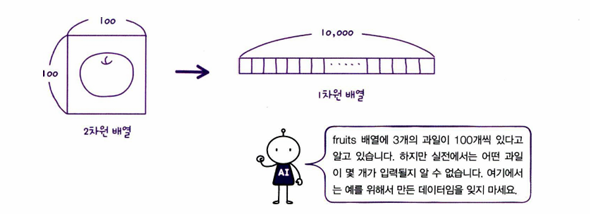

In [ ]:
# reshape() 메서드를 사용해 두 번째 차원(100)과 세 번째 차원(100)을 10,000으로 합침, 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

print(apple.shape)

(100, 10000)


In [ ]:
# 샘플마다 픽셀의 평균값을 계산 - 샘플의 값은 가로로 나열되어 있으니 axis=l로 지정하여 평균을 계산
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


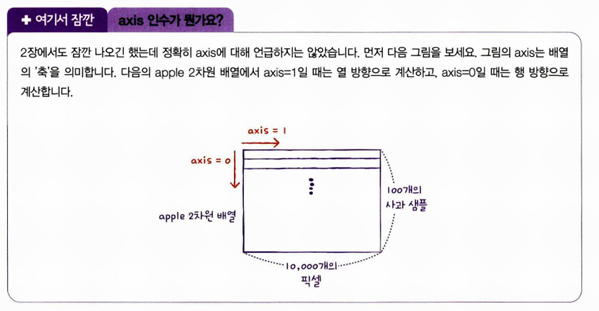

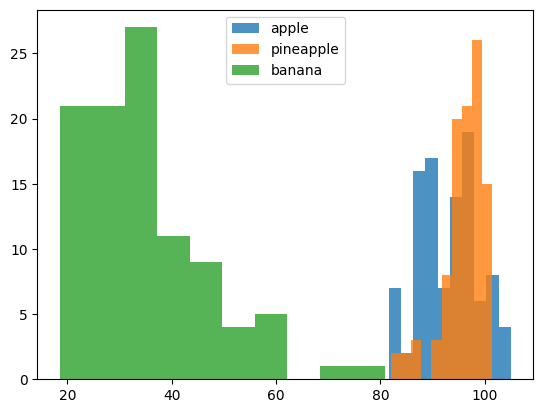

In [ ]:
# 평균값이 어떻게 분포되어 있는지 히스토그램(구간별로 값이 발생한 빈도를 표시한 그래프) 확인
# alpha : 투명도
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
plt.legend() #범례
plt.show()
# 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작음
# 사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문에 픽셀값만으로 구분 쉽지 않음

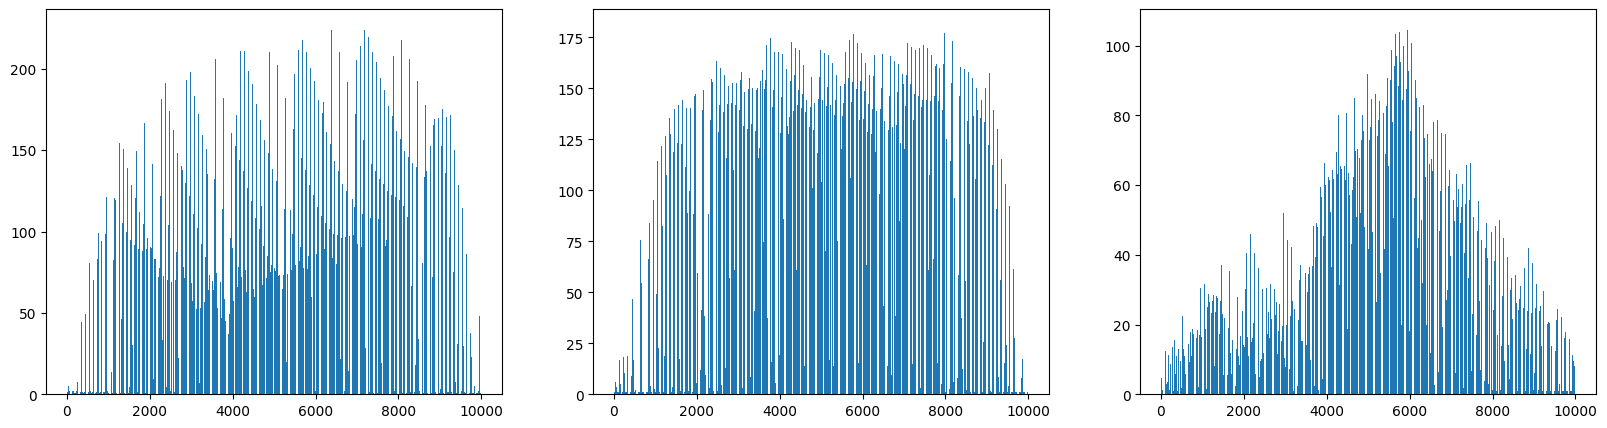

In [ ]:
# 전체 샘플에 대해 각 픽셀의 평균 값 비교
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), apple.mean(axis=0)) # 픽셀 10,000개에 대한 평균값의 막대그래프
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()
# 사과는 사진 중앙에 상대적으로 값이 작은 영역이 보이고 파인애플 그래프는 비교적 고르면서 높음.

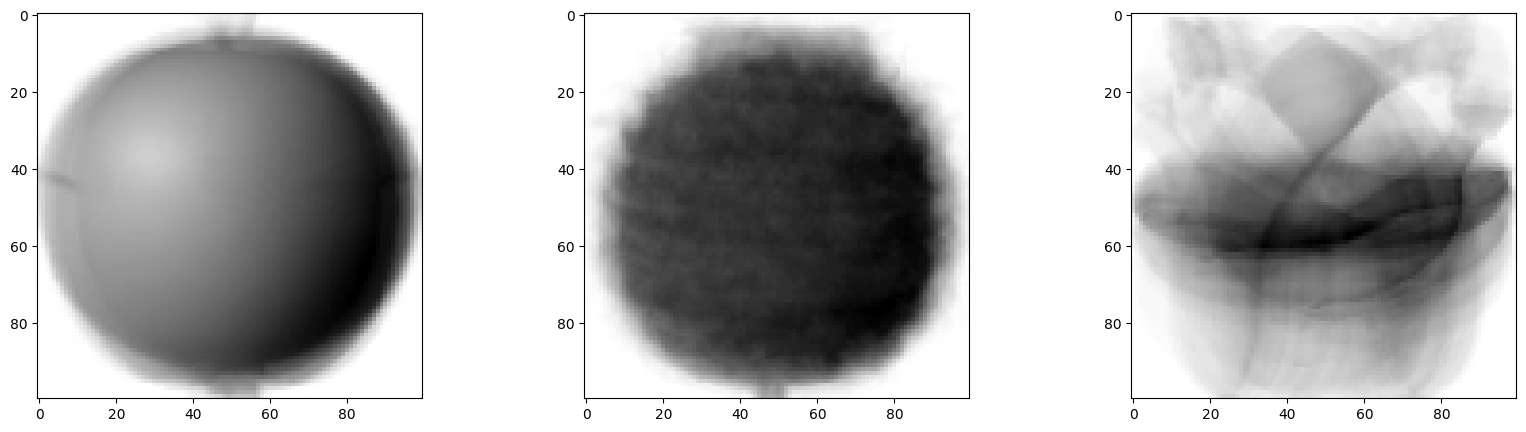

In [ ]:
# 픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력
# 픽셀을 평균 낸 이미지 => 모든 사진을 합쳐 놓은 대표 이미지
apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean(axis=0).reshape(100, 100)
banana_mean = banana.mean(axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

In [ ]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape) # 각 샘플의 오차 평균

(300,)


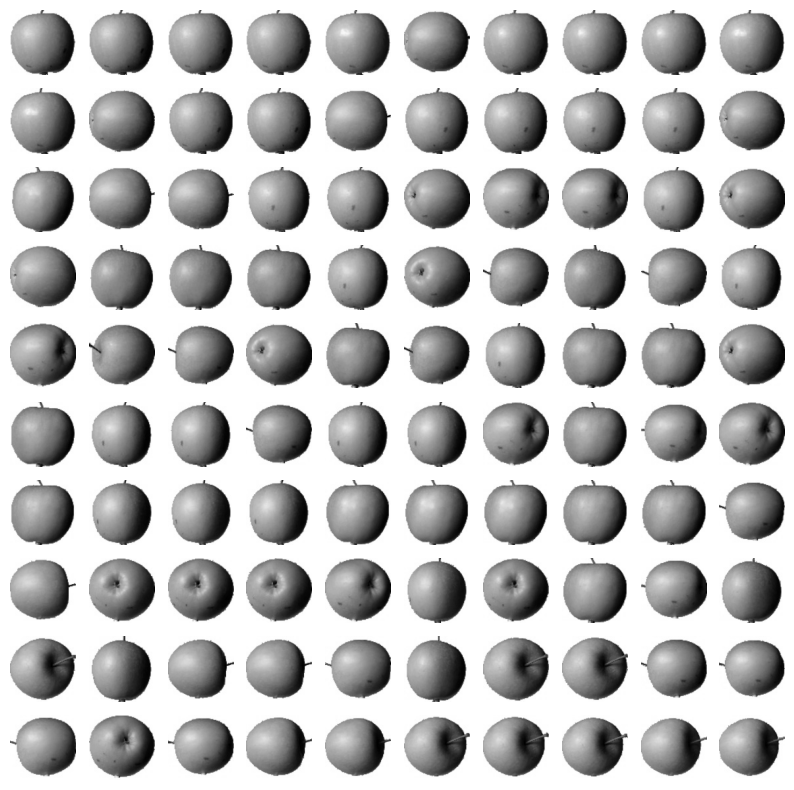

In [ ]:
# 절댓값 오차가 작은 샘플(평균에 가까운 사진) 100개 그리기
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10, 10)
# 서브 그래프 생성
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i, j]], cmap='gray_r') #서브 그래프 위치 지정
        axs[i, j].axis('off') # 좌표축 그리지 X
plt.show()

->  사과, 파인애플, 바나나 사진임을 미리 알고 있었기 때문에 각 과일의 평균을 구해서 가장 가까운 사진을 고를 수 있었습니다. 실제 비지도 학습에서는 타깃값을 모르기 때문에 샘플의 평균값을 미리 구할 수 없습니다.

타깃값을 모르면서 평균값을 찾을 수 있는 방법 : k-평균 알고리즘

#### 확인문제

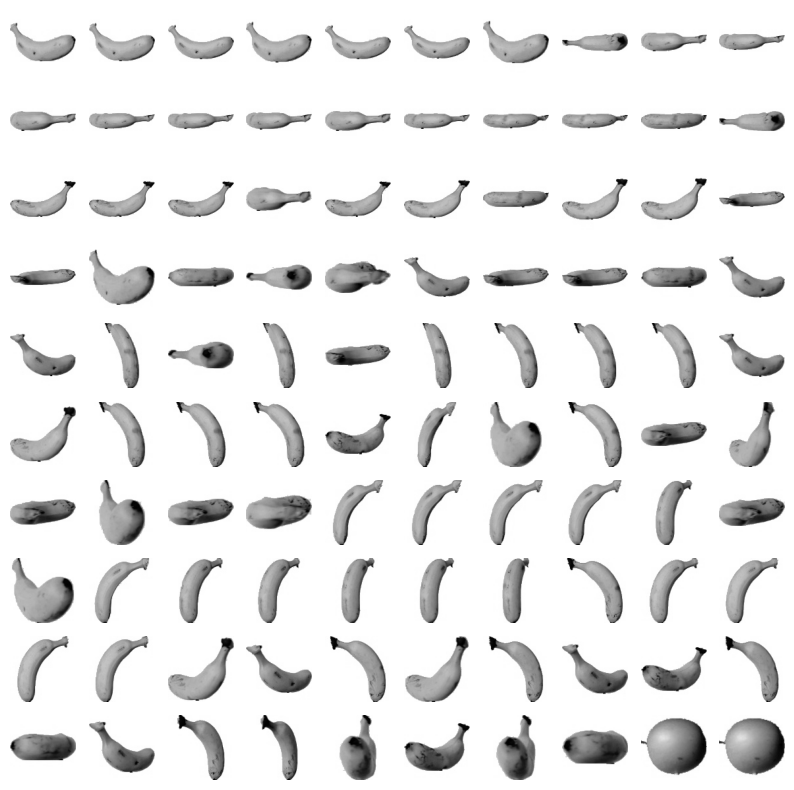

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]
banana_index = banana_index.reshape(10, 10)
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i, j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()